In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [3]:
fifa_df = pd.read_csv(r'C:\Users\canit\Downloads\fifa.csv')
fifa_df.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
fifa_var = pd.read_csv(r'C:\Users\canit\Downloads\fifa_ variable_information.csv')
fifa_var.head(5)

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


In [5]:
print(fifa_df.shape)

(18207, 60)


In [6]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [7]:
fifa_df.drop(columns=['Photo','Flag','Club Logo'],inplace=True)
fifa_df.head(2)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


In [8]:
def convert_to_float(value):
    value = str(value).replace('€', '').replace('M', 'e6').replace('K', 'e3')
    return float(value)

fifa_df['Value'] = fifa_df['Value'].apply(convert_to_float)
fifa_df['Wage'] = fifa_df['Wage'].apply(convert_to_float)
fifa_df['Release Clause'] = fifa_df['Release Clause'].apply(convert_to_float)

In [9]:
fifa_df.head(2)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0


In [10]:
fifa_df['Joined'] = pd.to_datetime(fifa_df['Joined'], errors='coerce').dt.year
fifa_df['Joined'].head()

0    2004.0
1    2018.0
2    2017.0
3    2011.0
4    2015.0
Name: Joined, dtype: float64

In [11]:
fifa_df['Contract Valid Until'] = pd.to_datetime(fifa_df['Contract Valid Until'], errors='coerce')
fifa_df['Contract Valid Until'].head()

0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract Valid Until, dtype: datetime64[ns]

In [12]:
def convert_height(height):
    try:
        feet, inches = height.split("'")
        return float(feet) * 12 + float(inches)
    except:
        return np.nan  # handle possible non-numeric values

fifa_df['Height'] = fifa_df['Height'].apply(convert_height)
print(fifa_df['Height'].head())

0    67.0
1    74.0
2    69.0
3    76.0
4    71.0
Name: Height, dtype: float64


In [13]:
def convert_weight(weight):
    weight = str(weight).replace('lbs', '')
    return float(weight)

fifa_df['Weight'] = fifa_df['Weight'].apply(convert_weight)
print(fifa_df['Weight'].head())

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64


In [13]:
fifa_df.isnull().sum()/len(fifa_df)*100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         8.529686
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
ShortPassing                 0.263635
Volleys     

In [14]:
# impute missing values
for column in fifa_df.columns:
    if fifa_df[column].dtype == 'object':  # Check if the column is of object type
        fifa_df[column].fillna(fifa_df[column].mode()[0], inplace=True)
    else:  # If the column is numeric type
        fifa_df[column].fillna(fifa_df[column].mean(), inplace=True)

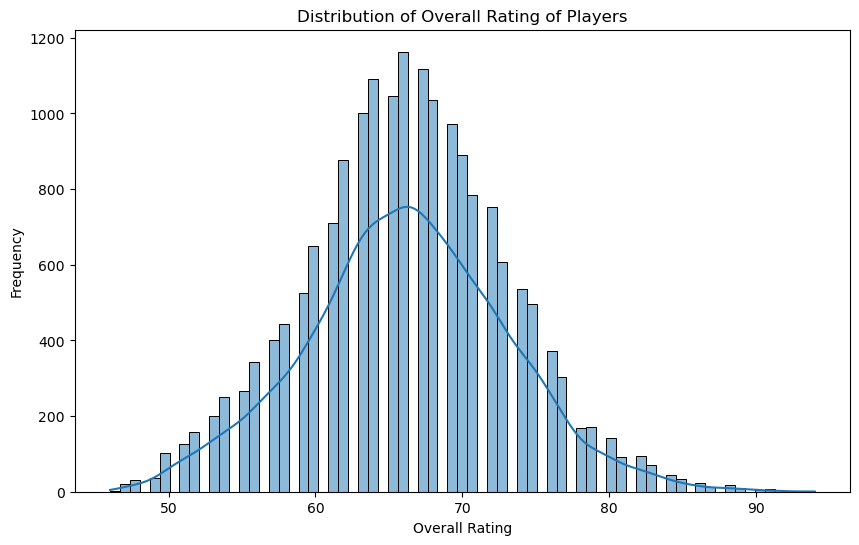

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(fifa_df['Overall'], kde = True)
plt.title('Distribution of Overall Rating of Players')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

We can see that the perfect bell shape suggest that the data is normally distributed

In [16]:
Top_20= fifa_df.nlargest(20,'Overall')[['Name','Overall']]
print(Top_20)

                 Name  Overall
0            L. Messi       94
1   Cristiano Ronaldo       94
2           Neymar Jr       92
3              De Gea       91
4        K. De Bruyne       91
5           E. Hazard       91
6           L. Modrić       91
7           L. Suárez       91
8        Sergio Ramos       91
9            J. Oblak       90
10     R. Lewandowski       90
11           T. Kroos       90
12           D. Godín       90
13        David Silva       90
14           N. Kanté       89
15          P. Dybala       89
16            H. Kane       89
17       A. Griezmann       89
18      M. ter Stegen       89
19        T. Courtois       89


In [17]:
Top_20 = fifa_df.nlargest(20,'Overall')
print(Top_20)

        ID               Name  Age Nationality  Overall  Potential  \
0   158023           L. Messi   31   Argentina       94         94   
1    20801  Cristiano Ronaldo   33    Portugal       94         94   
2   190871          Neymar Jr   26      Brazil       92         93   
3   193080             De Gea   27       Spain       91         93   
4   192985       K. De Bruyne   27     Belgium       91         92   
5   183277          E. Hazard   27     Belgium       91         91   
6   177003          L. Modrić   32     Croatia       91         91   
7   176580          L. Suárez   31     Uruguay       91         91   
8   155862       Sergio Ramos   32       Spain       91         91   
9   200389           J. Oblak   25    Slovenia       90         93   
10  188545     R. Lewandowski   29      Poland       90         90   
11  182521           T. Kroos   28     Germany       90         90   
12  182493           D. Godín   32     Uruguay       90         90   
13  168542        Da

In [18]:
Avg_Age= Top_20['Age'].mean()
print('Average age of players: ', Avg_Age)
Avg_Wage= Top_20['Wage'].mean()
print('Average wage of players: ', Avg_Wage)

Average age of players:  28.3
Average wage of players:  289700.0


In [19]:
highest_wage_player = Top_20.loc[Top_20['Wage'].idxmax()]
print(f"Player with highest wage: {highest_wage_player['Name']}, Wage: {highest_wage_player['Wage']}")

Player with highest wage: L. Messi, Wage: 565000.0


Generate a dataframe which should include the "Player name", "Club
Name", "Wage", and 'Overall rating'. (4 Points)
- i) find the average Overall rating for each club.
- ii) Display the average overall rating of Top10 Clubs using a plot

In [20]:
player_club_info = fifa_df[['Name', 'Club', 'Wage', 'Overall']]
print(player_club_info)
avg_overall_rating = player_club_info.groupby('Club')['Overall'].mean().reset_index()
top_10_clubs = avg_overall_rating.nlargest(10, 'Overall')
print(top_10_clubs)

                     Name                 Club      Wage  Overall
0                L. Messi         FC Barcelona  565000.0       94
1       Cristiano Ronaldo             Juventus  405000.0       94
2               Neymar Jr  Paris Saint-Germain  290000.0       92
3                  De Gea    Manchester United  260000.0       91
4            K. De Bruyne      Manchester City  355000.0       91
...                   ...                  ...       ...      ...
18202        J. Lundstram      Crewe Alexandra    1000.0       47
18203  N. Christoffersson       Trelleborgs FF    1000.0       47
18204           B. Worman     Cambridge United    1000.0       47
18205      D. Walker-Rice      Tranmere Rovers    1000.0       47
18206           G. Nugent      Tranmere Rovers    1000.0       46

[18207 rows x 4 columns]
                    Club    Overall
326             Juventus  82.280000
398               Napoli  80.000000
315                Inter  79.750000
470          Real Madrid  78.242424
38

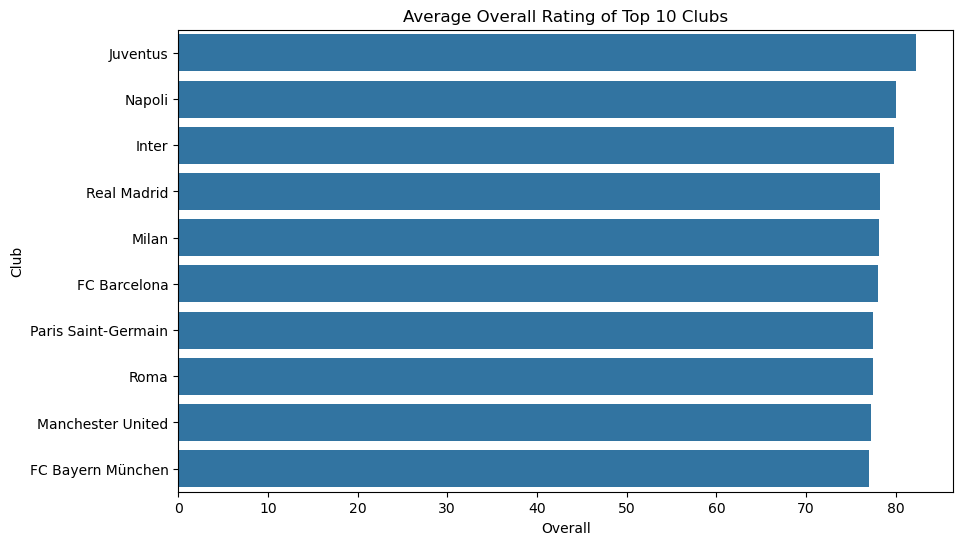

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Overall', y='Club', data=top_10_clubs)
plt.title('Average Overall Rating of Top 10 Clubs')
plt.show()

What is the relationship between age and individual potential of the
player? Visualize the relationship with appropriate plot and Comment on
the same

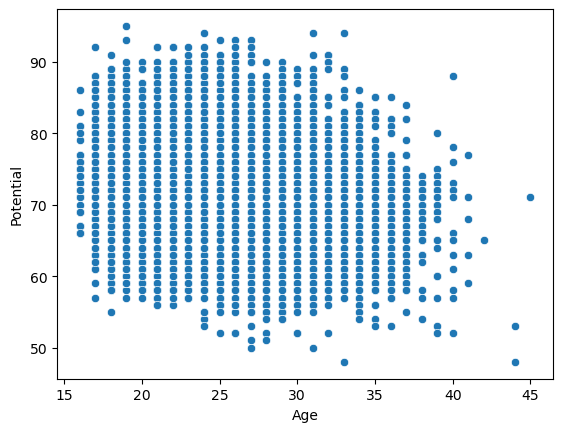

In [21]:
sns.scatterplot(x = 'Age', y = 'Potential', data = fifa_df)
plt.show()

Younger players may tend to have higher potential, indicating they have room for growth. Older players might have more stable but lower potential.

Which features directly contribute to the wages of the players?
Support your answer with a plot and a metric. (2 points) (hint: use
potential, Overall, value, international reputation, and Release Clause)

                              Wage  Potential   Overall     Value  \
Wage                      1.000000   0.486413  0.571926  0.858442   
Potential                 0.486413   1.000000  0.660939  0.576218   
Overall                   0.571926   0.660939  1.000000  0.627085   
Value                     0.858442   0.576218  0.627085  1.000000   
International Reputation  0.668515   0.372375  0.499243  0.653059   
Release Clause            0.828161   0.562346  0.597821  0.972041   

                          International Reputation  Release Clause  
Wage                                      0.668515        0.828161  
Potential                                 0.372375        0.562346  
Overall                                   0.499243        0.597821  
Value                                     0.653059        0.972041  
International Reputation                  1.000000        0.620863  
Release Clause                            0.620863        1.000000  


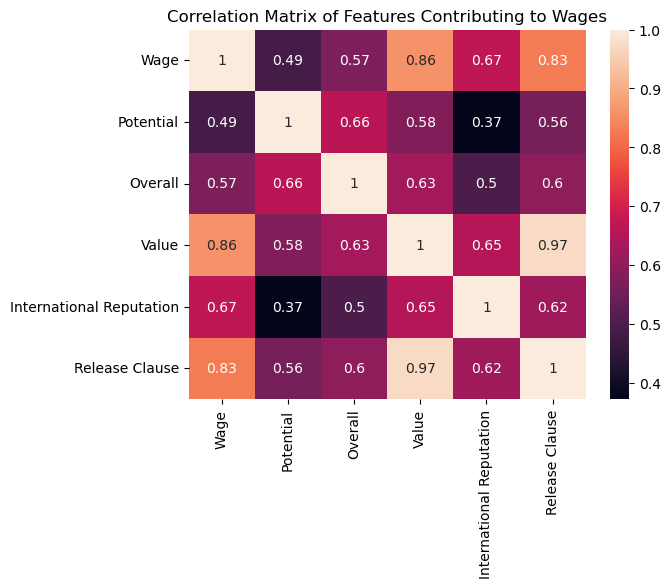

In [22]:
correlation_matrix = fifa_df[['Wage', 'Potential', 'Overall', 'Value', 'International Reputation', 'Release Clause']].corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Features Contributing to Wages')
plt.show()

Features like Overall rating, Potential, Value, and Release Clause might show a strong positive correlation with Wage.

Find the position in the pitch where the maximum number of players
play and the position where the minimum number of players play? Display
it using a plot

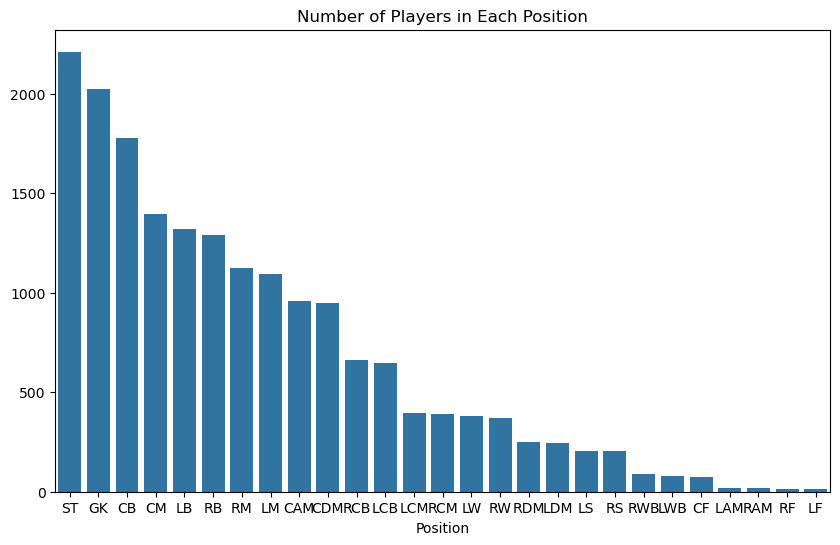

In [23]:
position_count = fifa_df['Position'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=position_count.index, y=position_count.values)
plt.title('Number of Players in Each Position')
plt.show()

How many players are from the club 'Juventus' and the wage is greater
than 200K? Display all the information of such players

In [24]:
fifa_df[(fifa_df['Club']=='Juventus') & (fifa_df['Wage']>200000)]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0


Generate a data frame containing top 5 players by Overall rating for
each unique position

In [26]:
top_5_by_position = fifa_df.groupby('Position').apply(lambda x: x.nlargest(5, 'Overall')).reset_index(drop=True)
print(top_5_by_position)

         ID               Name  Age Nationality  Overall  Potential  \
0    194765       A. Griezmann   27      France       89         90   
1    190460         C. Eriksen   26     Denmark       88         91   
2    201942    Roberto Firmino   26      Brazil       86         87   
3    189596          T. Müller   28     Germany       86         86   
4    176635            M. Özil   29     Germany       86         86   
..      ...                ...  ...         ...      ...        ...   
130   20801  Cristiano Ronaldo   33    Portugal       94         94   
131  188545     R. Lewandowski   29      Poland       90         90   
132  202126            H. Kane   24     England       89         91   
133  153079          S. Agüero   30   Argentina       89         89   
134  173731            G. Bale   28       Wales       88         88   

                  Club       Value      Wage Preferred Foot  ...  Composure  \
0      Atlético Madrid  78000000.0  145000.0           Left  ...    

Average wage by position

In [27]:
avg_wage_by_position = top_5_by_position.groupby('Position')['Wage'].mean().reset_index()
print(avg_wage_by_position)

   Position      Wage
0       CAM  174000.0
1        CB  139600.0
2       CDM  217000.0
3        CF   47400.0
4        CM  130600.0
5        GK  192800.0
6       LAM   81600.0
7        LB  177200.0
8       LCB  162000.0
9       LCM  184400.0
10      LDM  126600.0
11       LF  121200.0
12       LM  164600.0
13       LS  130200.0
14       LW  261000.0
15      LWB   34200.0
16      RAM   45400.0
17       RB  155400.0
18      RCB  231000.0
19      RCM  240800.0
20      RDM  105000.0
21       RF  148000.0
22       RM  131400.0
23       RS  132200.0
24       RW  202000.0
25      RWB   44200.0
26       ST  294000.0
